<div class="alert alert-success">
<b>Reviewer's comment V2</b>

The project is accepted! Good luck on the final sprint!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but it seems that the tasks related to clustering are missing from the notebook. Maybe you accidentally sent the wrong version?

# Predicting Customer Churn in Gyms

Project description: The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.

# Table of Contents
Step 1 Preliminary analysis of dataset
Step 1.1 General information and basic pre-processing
Step 1.2 Project goals
Step 2 Exploratory data analysis (EDA)
Step 2.1 Summary statistics and bar histograms of features
Step 2.2 Summary statistics and bar histograms of features grouped by churn property
Step 2.3 Linear dependency analysis via the correlation matrix
Step 3 Building a model to predict churn
Step 4 Creating user clusters
Step 5 General conclusions and recommendations

Importing libraries: First, we import all code libraries and define output style functions we will be using in our project.

In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV



Project goals: The main purpose of this project is to analyze customer profiles of the gym chain and come up with a customer retention strategy. For that purpose, we will:

predict the probability of churn (for the upcoming month) for each customer;
draw up typical user portraits: select the most outstanding groups and describe their main features;
analyze the factors that impact churn most;
draw basic conclusions and develop recommendations on how to improve customer service by:
identifying target groups;
suggesting measures to cut churn;
describing any other patterns you see with respect to interaction with customers.

# Step 1. General overview of the dataset and the project goals
Model Fitness provided us with a csv file containing data on churn for a given month and information on the month preceding it.

The file path is: /datasets/gym_churn_us.csv

They also gave us the following information on the dataset's fields:

Churn — the fact of churn for the month in question

Current dataset fields:
User data for the preceding month
gender
Near_Location — whether the user lives or works in the neighborhood where the gym is located
Partner — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
Age — whether the user provided their phone number
Lifetime — the time (in months) since the customer first came to the gym
Data from the log of visits and purchases and data on current membership status:
Contract_period — 1 month, 3 months, 6 months, or 1 year
Month_to_end_contract — the months remaining until the contract expires
Group_visits — whether the user takes part in group sessions
Avg_class_frequency_total  — average frequency of visits per week over the customer's lifetime
Avg_class_frequency_current_month  — average frequency of visits per week over the preceding month
Avg_additional_charges_total — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

General information and basic pre-processing

# Read the data 

In [234]:
gymdf=pd.read_csv('/content/gym_churn_us.csv')
gymdf

In [235]:
#check the messing values if there any
gymdf.isnull().sum()

In [236]:
gymdf.info()

In [237]:
# compute the summary statistics for each column
gymdf.describe().T



In [238]:
# we need to rename columns in order for easy access
#renaming columns 
gymdf.columns = ['gender', 'nearLocation', 'partner', 'promoFriends', 'phone',
       'contractPeriod', 'groupVisits', 'age',
       'avgTotalAdditionalCharges', 'monthToEndContract', 'lifetime',
       'avgWeeklyVisitsLifetime', 'avgWeeklyVisitsCurrentMonth',
       'Churn']


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

## EDA for dependent variable 

In [239]:
gymdf.nunique().sort_values()

In [240]:
#from the previous table we can see that we have 7 coulms have 2 values
#so we need to understand the datamore and visulize the binary data to see if the data is balance or not
binary_columns=[col for col in gymdf.columns if gymdf[col].nunique()==2]
binary_columns

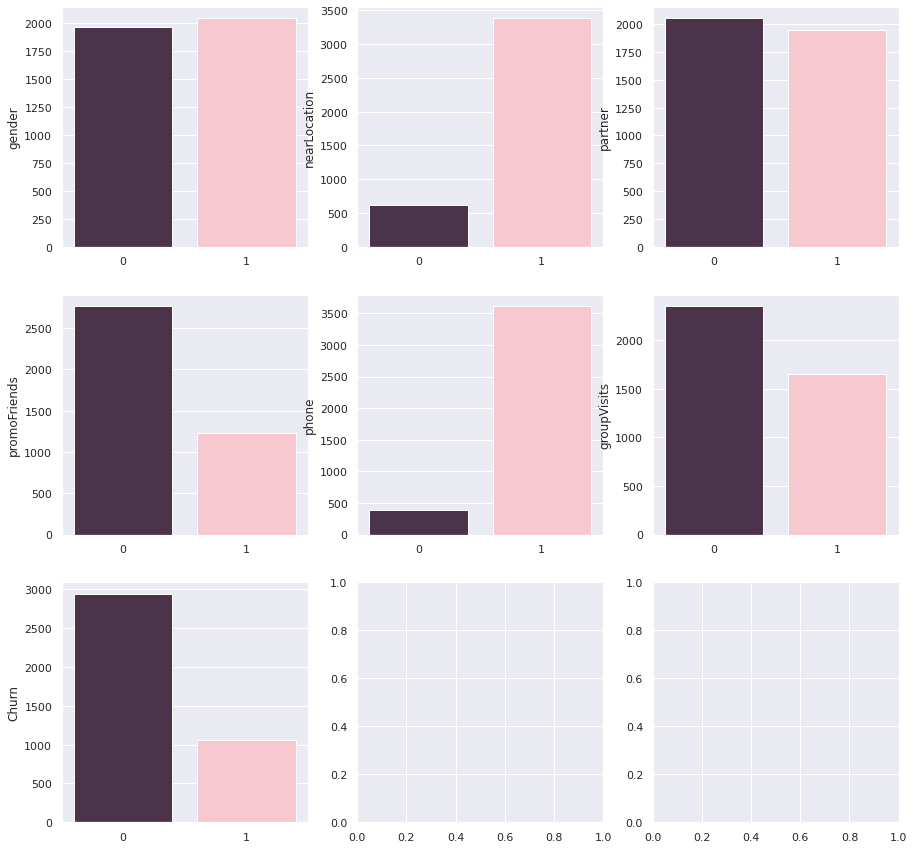

In [241]:
binary_cols = gymdf[binary_columns]

# Create a figure with 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Loop through each subplot and plot the value counts for each binary column
for i, ax in enumerate(axes.flatten()):
    if i == binary_cols.shape[1]:break
    sns.barplot(x=binary_cols.iloc[:, i].value_counts().index, y=binary_cols.iloc[:, i].value_counts(), ax=ax,palette=['#4f2f4f','pink'])
    

# Show the plot
plt.show()

From the subgraph above we can see the most of the data are balnce exept 3 columns **nearLocation** , **phone** and **churn** but churn and nearlocation we can't remove thim because its important feature so we should remove the phone and drop it from the dataframe science it will affect the prediction and accuracy


In [242]:
#drop the column
gymdf.drop(columns='phone',inplace=True)


In [243]:
nonBinary = [col for col in gymdf.columns if gymdf[col].nunique() > 2]
nonBinary


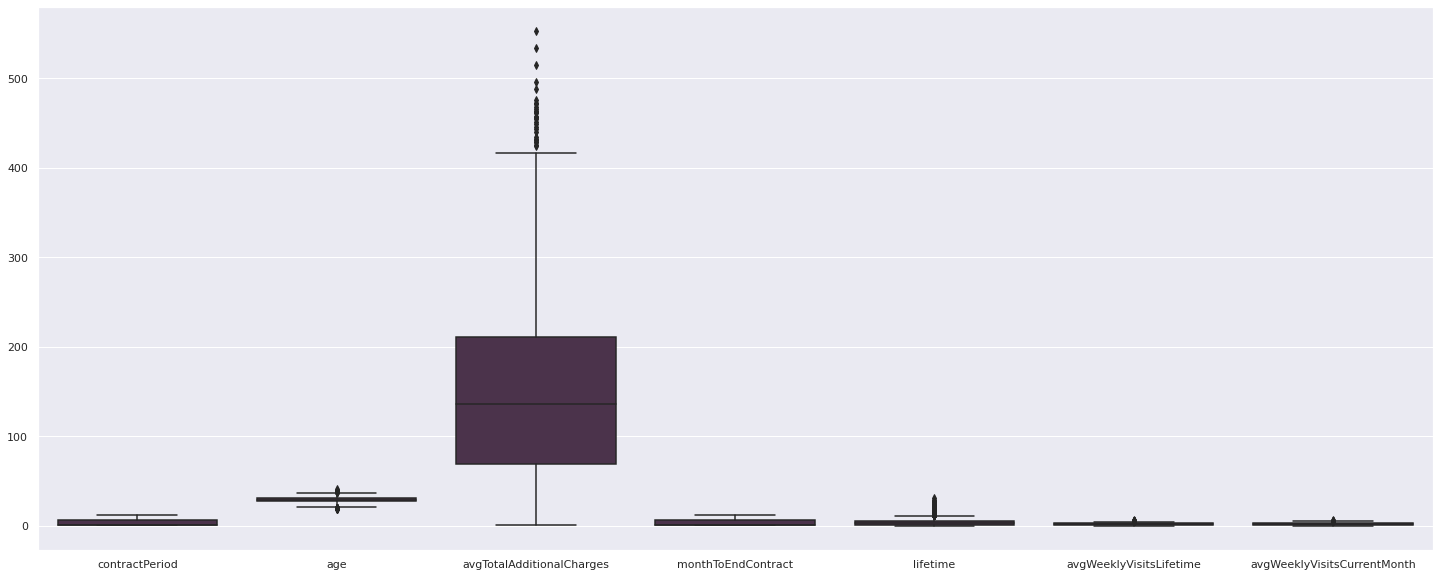

In [244]:
plt.figure(figsize=(25,10))
sns.boxplot(data=gymdf[nonBinary], color='#4f2f4f')

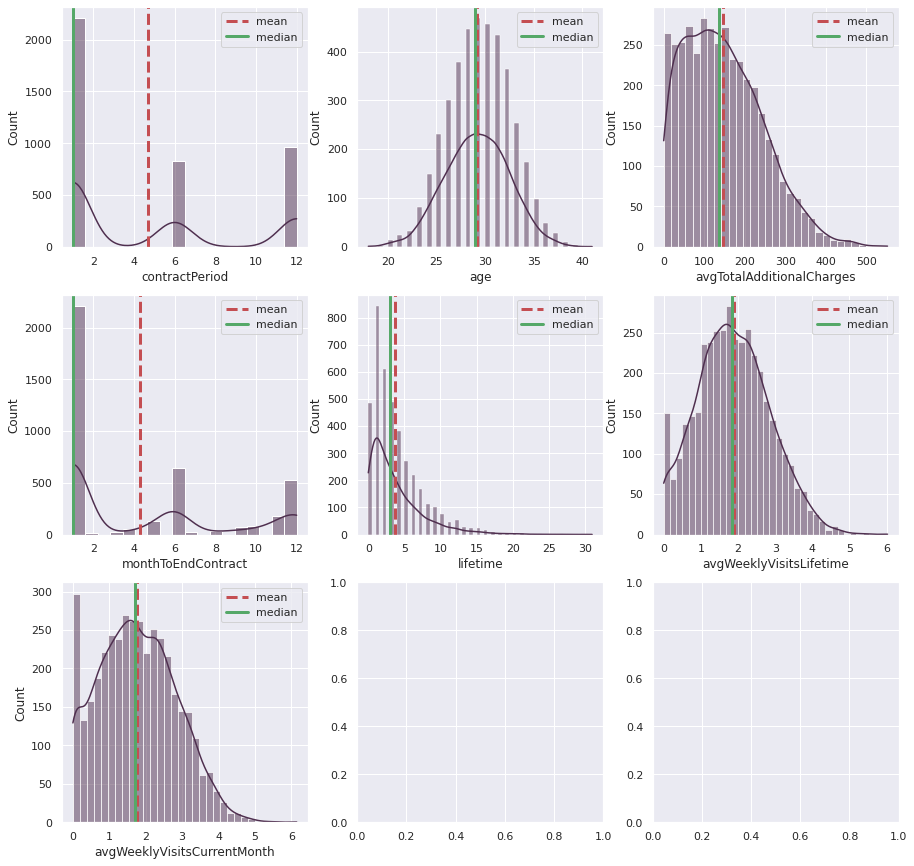

In [245]:


# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")




# create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# iterate over the columns
for i, col in enumerate(nonBinary):
    # use the loop variable and the subplot index to create a histogram for each column
    sns.histplot(data=gymdf, x=col, kde=True, color="#4f2f4f", ax=axs[i//3, i%3])
    # calculate the mean and median of the column
    col_mean = gymdf[col].mean()
    col_median = gymdf[col].median()

    # use axvline to add a vertical line at the mean and median positions
    axs[i//3, i%3].axvline(col_mean, color="r", linestyle="--", label="mean",linewidth=3)
    axs[i//3, i%3].axvline(col_median, color="g", linestyle="-", label="median",linewidth=3)

    

    axs[i//3, i%3].legend()




plt.show()

Here is summary of the graphs:


1.   Most users are relatively new: Roughly half of users have 4 months or less with the company with some long time users having stayed as member for 12 to 30 months as indicated in the right tail of the distribution.
2.   Month to end contract and contract period tell the same story especially considering that: 85% of users have 1 month contract
3.   Avg. weekly visits for current month and lifetime seem to have high correlations with each other. This makes sense as most users have 1 month contracts.







<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good! You caompared the two groups and made some useful observations! Excellent visualizations!

</div>

makeing a coloration matrix for non binary columns

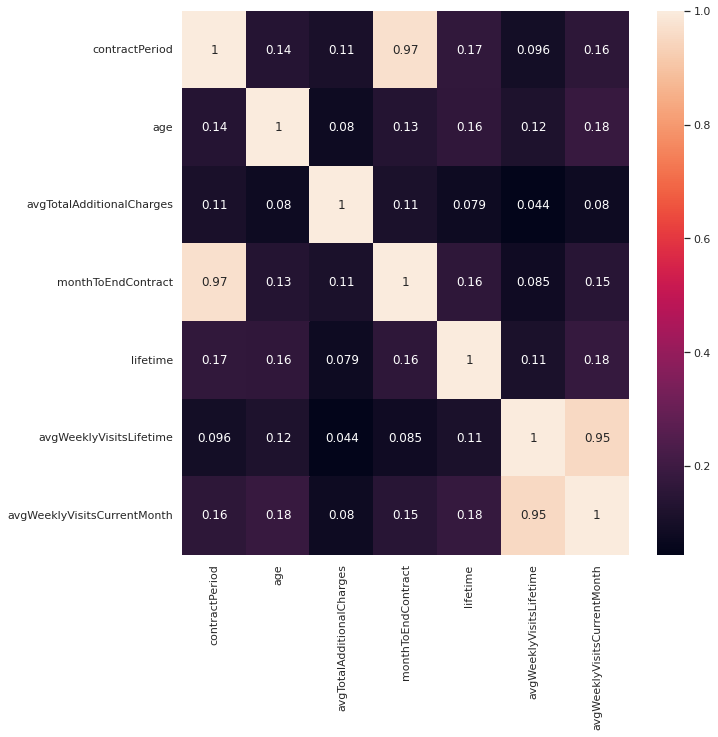

In [246]:
plt.figure(figsize=(10,10))
corr = gymdf[nonBinary].corr()
sns.heatmap(corr, annot = True)


1.   Avg. weekly visits for current month and lifetime seem to have high correlations with each other. This makes sense as most users have 1 month contracts.

2.   also we can see that there is a high coloration with contractperiod and monthtoendcontract



<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!
    

</div>

## EDA for independent variable 

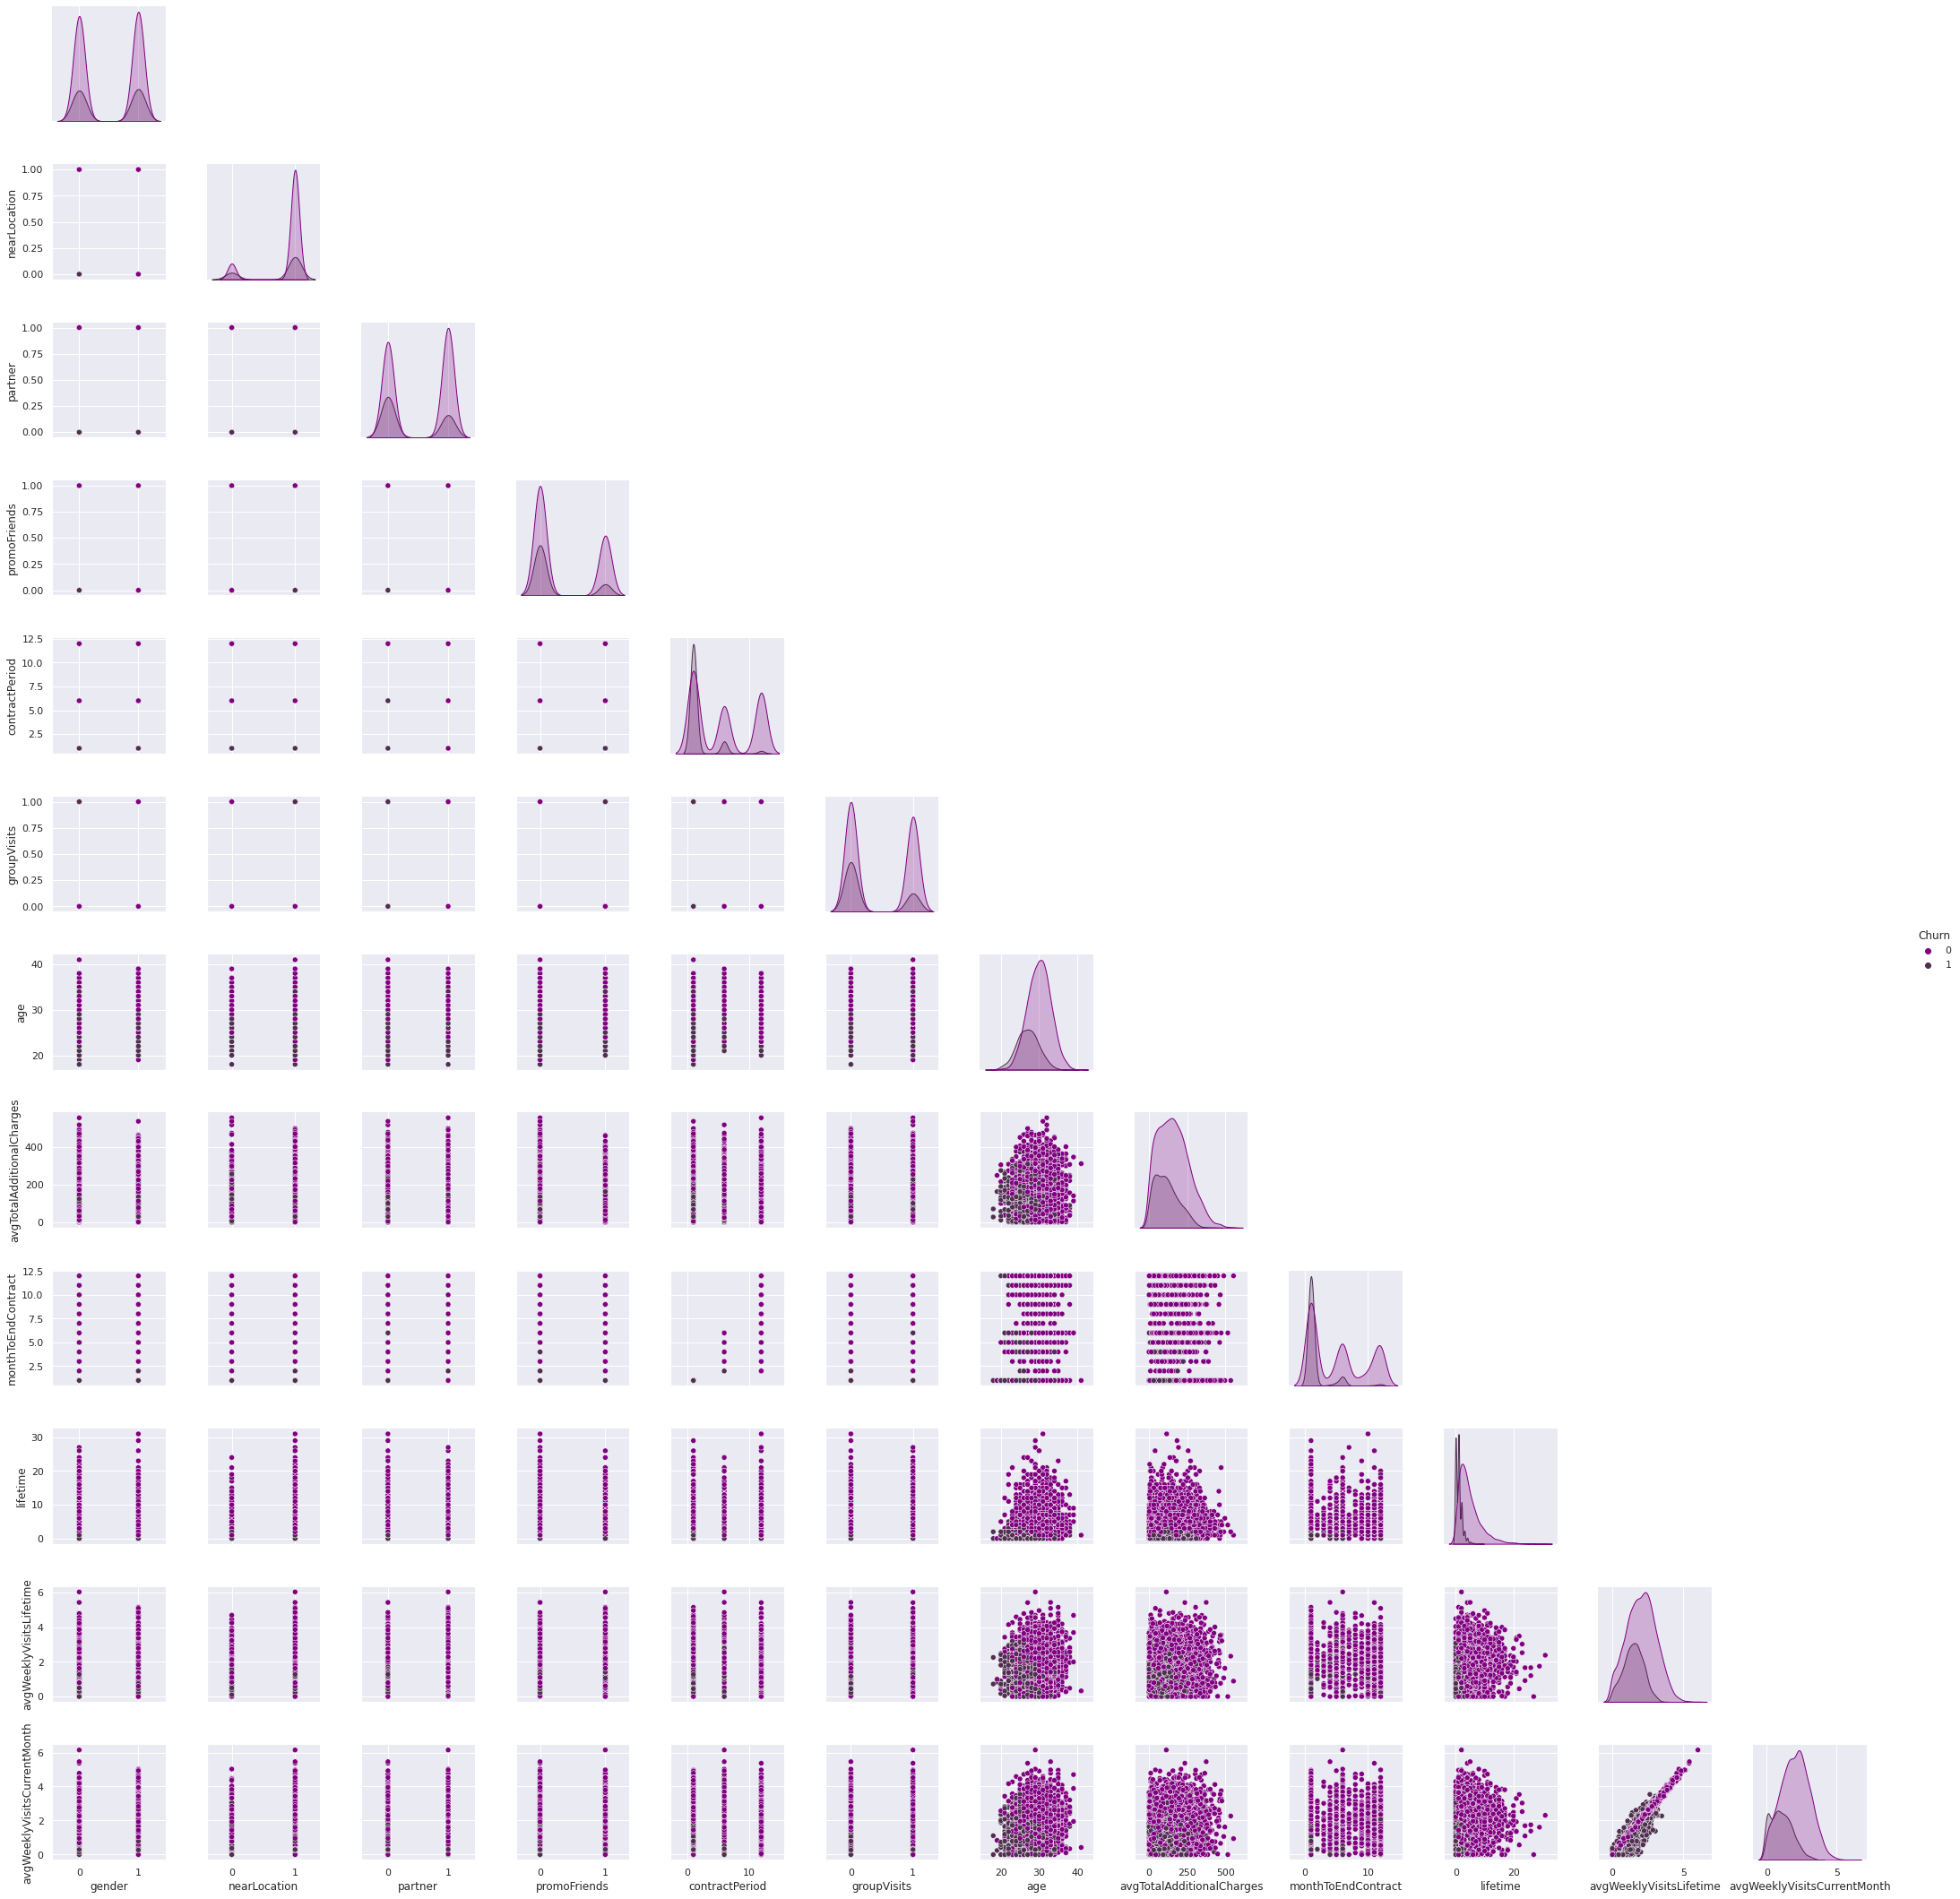

In [247]:
#we will plot all the columns to other to create a matrix
#IT WILL TAKE LONG TO COMPILE
sns.pairplot(gymdf, hue="Churn", palette=["purple", "#4f2f4f"],corner=True)


<div class="alert alert-warning">
<b>Reviewer's comment</b>

The scatter plots above and below the diagonal are the same (just transposed), so we can only keep one copy using `corner=True` parameter

</div>

# modeling

Since the proplem is a classification proplem we need to use classfier algorthims which the following XGBClassifier,LogisticRegression RandomForestClassifier, DecisionTreeClassifier,GaussianNB,SVC

In [248]:
# split data into features and target
X = gymdf.drop(columns="Churn")
y = gymdf["Churn"]

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [249]:
# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the training data
X_train_st = scaler.fit_transform(X_train)

# transform the test data
X_test_st = scaler.transform(X_test)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test sets, scaling was applied correctly

</div>

In [250]:
classifiers = [
    XGBClassifier(), 
    LogisticRegression(), 
    RandomForestClassifier(), 
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC()
]

In [251]:

# create an empty DataFrame to store the results
results = pd.DataFrame(columns=["classifier", "accuracy", "precision", "recall", "f1-score"])

feature_importances = {}

for classifier in classifiers:
    # train the classifier on the training data
    classifier.fit(X_train_st, y_train)
    
    # predict the labels of the test data
    y_pred = classifier.predict(X_test_st)
    
    # calculate the accuracy of the classifier
    accuracy = classifier.score(X_test_st, y_test)
    
    # generate a classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # extract the precision, recall, f1-score, and support for each class
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1 = report["1"]["f1-score"]
    
    # add a row to the DataFrame with the results for this classifier
    results = results.append({"classifier": classifier.__class__.__name__,
                              "accuracy": accuracy,
                              "precision": precision,
                              "recall": recall,
                              "f1-score": f1,}, ignore_index=True)
    if hasattr(classifier, "feature_importances_"):
      feature_importances[classifier.__class__.__name__] = classifier.feature_importances_

# display the DataFrame
results.style.highlight_max(subset=["f1-score"], color="yellow")

<div class="alert alert-danger">
<S><b>Reviewer's comment</b>

For binary classification models precision/recall/f1 score should be reported for class 1, not 0

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

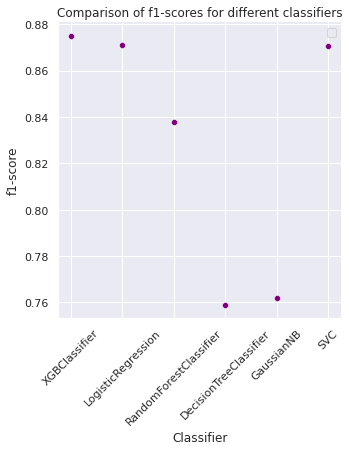

In [252]:

# Use the lineplot() function from the seaborn.relplot module to create a line plot
sns.relplot(x="classifier", y="f1-score", data=results, kind="scatter", color="purple", marker="o")

# Add labels to the axes and the plot
plt.xlabel("Classifier")
plt.ylabel("f1-score")
plt.title("Comparison of f1-scores for different classifiers")

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


# hyper parameter tuning

In [253]:
# Create the parameter grid
param_grid = {
    'max_depth': [4, 8, 12],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the XGBClassifier
xgb_classifier = XGBClassifier()

# Create the grid search model
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

<div class="alert alert-success">
<b>Reviewer's comment</b>

It's cool that you did some hyperparameter tuning with cross-validation

</div>

In [254]:
feature_importances['XGBClassifier']

In [255]:
X.columns

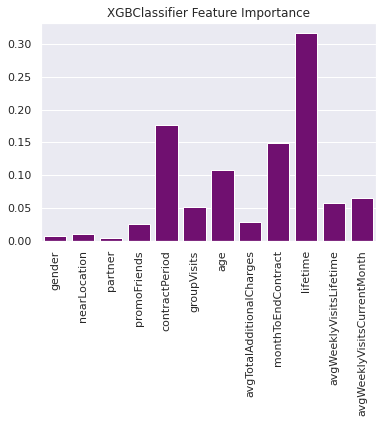

In [256]:
# Create a bar plot using seaborn
sns.barplot(x=X.columns, y=feature_importances['XGBClassifier'], color="purple")
plt.xticks(rotation=90)


# Add a title and show the plot
plt.title("XGBClassifier Feature Importance")
plt.show()

We see that the following features were found important (from most significant to less): lifetime, 'monthToEndContract', avgWeeklyVisitsLifetime, age, avgTotalAdditionalCharges, contractPeriod, avgWeeklyVisitsCurrentMonth.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great!

</div>

# Cluster analysis


In [195]:
gymdf.columns

In [273]:
cluster_df=gymdf.drop('Churn', axis=1)
#cluster_df=gymdf[['gender','nearLocation','partner','age','promoFriends','lifetime']]

In [275]:
# standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(cluster_df)


In [276]:
linkage_matrix = linkage(x_sc, method='complete')
linkage_matrix

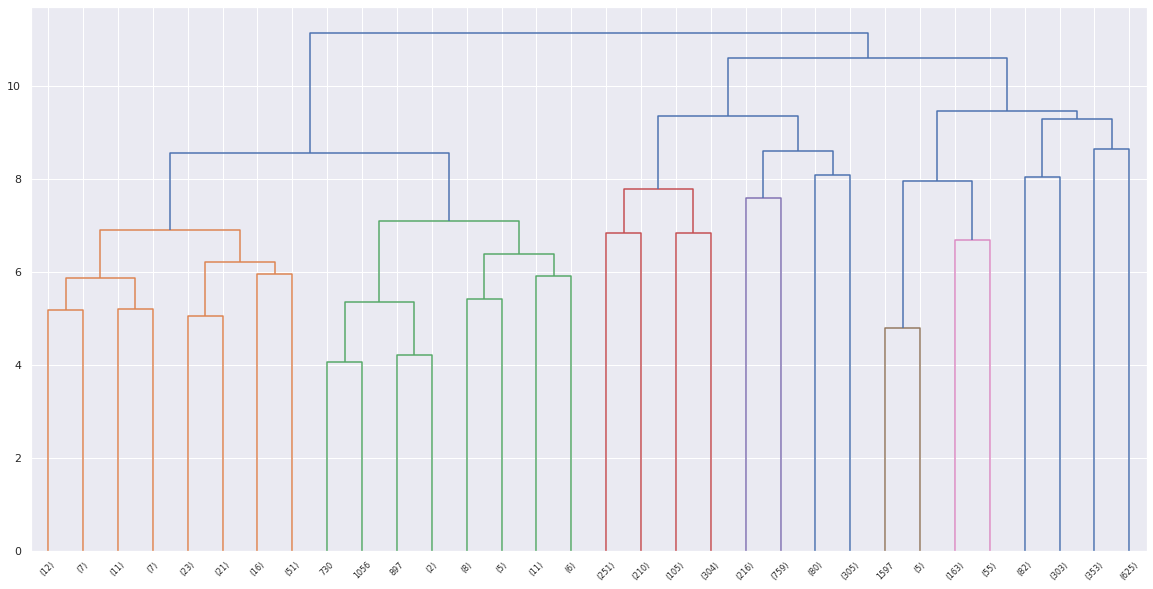

In [277]:
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, truncate_mode='level', p=4)
plt.show()

we can see from the dendrogram that we have 8 posible clustre for th users if we used all the data exepte the churn column

In [278]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x_sc)
predictions = kmeans.predict(x_sc)
cluster_df['cluster'] = predictions
gymdf['cluster'] = predictions

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

To make sure your research is reproducible it's a good idea to set the `random_state` parameter of KMeans (otherwise we can get slightly different results to random initialization of cluster centers)

</div>

In [279]:
cluster_mean = gymdf.groupby('cluster').mean()
cluster_mean

We can see that the mean for the cluster num '3' shows a higher mean than the other clusters in most columns

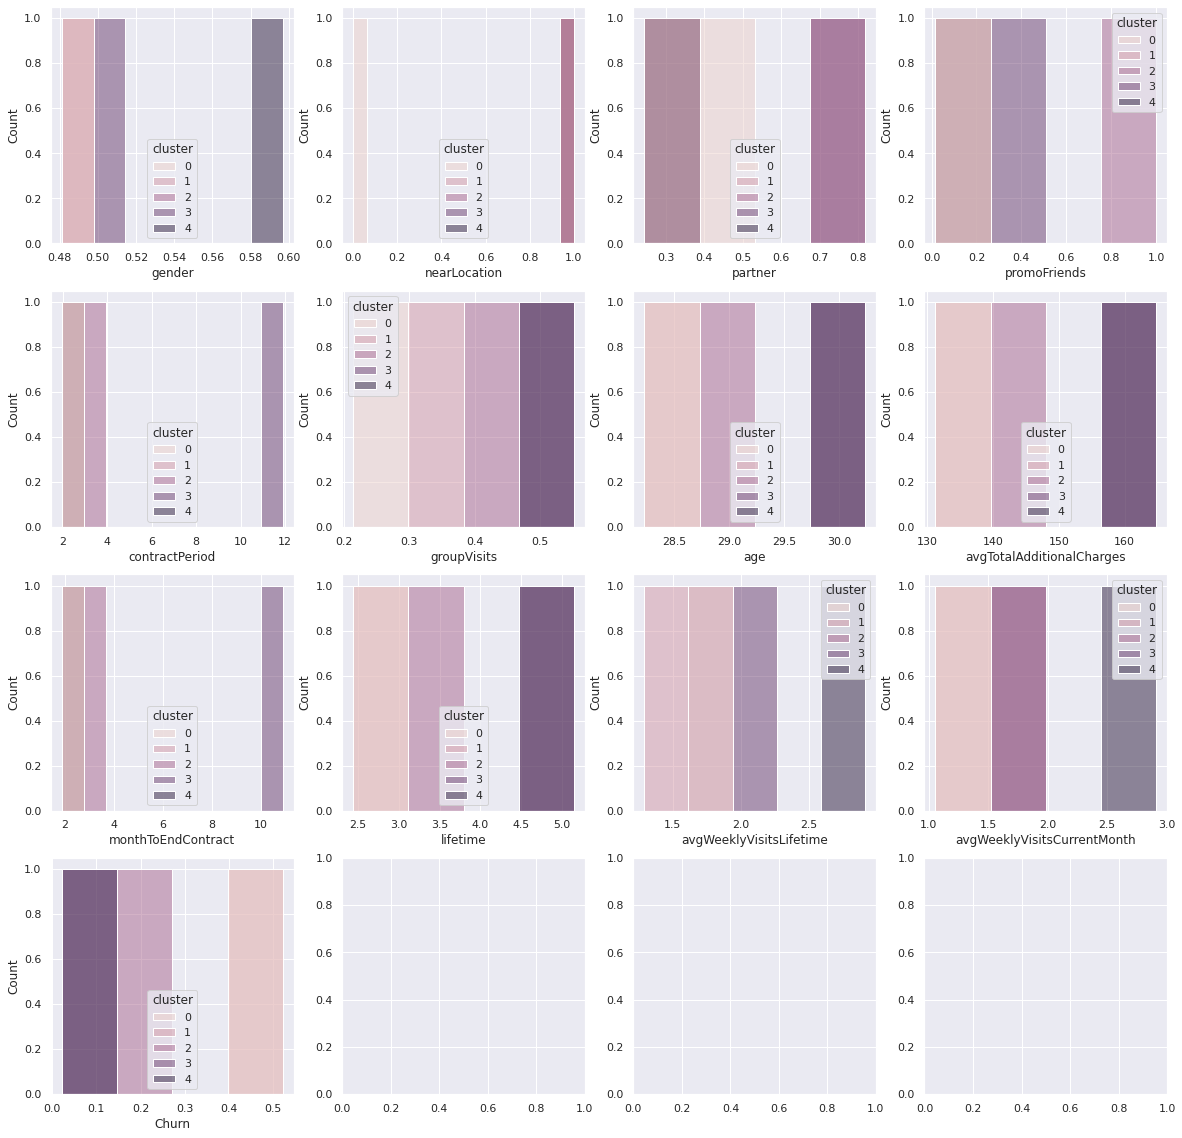

In [282]:

# Set up the figure
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

# Loop through each column in cluster_mean
for i, column in enumerate(cluster_mean):
    # Get the ax for the subplot
    ax = axs[i // 4, i % 4]
    # Plot the distribution for the column
    sns.histplot(data=cluster_mean, x=column, hue='cluster', ax=ax)

# Show the plot
plt.show()


In [286]:
#calcluate the churn rate
churn_rate = gymdf.groupby('cluster')['Churn'].mean()
churn_rate

We can see that the churn rate for cluster 1 and cluter 2 have is the most which mean that its that cluster 1 is the most  prone to leaving, and clustr 3 is loyal

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Good job identifying the clusters!

</div>

# Conclusions and Recommendations

In this last step, we draw our conclusions and formulate basic recommendations regarding the strategy for customer interaction and retention. In this project, we analyzed customer data of a gym to predict the churn probability and we identified customer profiles to help us come up with retention strategies. We started the project with some data preprocessing and continued with an in-depth EDA. These were followed up with model building for the purpose of binary classification: we were interested in building a 'good' model from our data to predict customer churn. For that purpose we run and evaluated the performance of Logistic Regression and Random Forest Classification algorithms and found out that the latter performed better. Finally, we run algorithms to cluster the customers optimally into classes and reported features' mean statistics for the found clusters. Here we summarize our findings by describing distinguishing features of the 5 customer profiles (clusters) we identified:

From the observations we made, we see that each cluster displays some distinguishing features from others (please make sure you have read the comment in bold letters in the previous step.):

Although Cluster 0's customers have an average of ca 5 months contract period and 5 months end to contract time, more than half of Cluster 0's customers have actually a 1 month long contract period. On average customer lifetime in this group is slightly less than 4 months. Interestingly, none of the customers in this group gave their phone numbers to the gym. About half of them joined through partners or friends promotion. About 40% participated group sessions, spent additionally ca. 145 dollars on average, and attended 1.8 classes per week on average over their lifetime.
Cluster 1 consist of the youngest customer cluster with the shortest contract and months to end contract period of both ca 1.5 months on average. A great majority of them actually have 1 month contracts. Given these short period, it is not surprising customer lifetime is also shortest in this cluster with a lifetime of 1 months on average. This is also the cluster that spends the least additional money, ca. 30 dollars less than Cluster 0's customers. The younger age average could be a factor in this. Although some of the customers joined through partner or friends promotions, 60% of the customers in this group did not join through any promotions. The majority do not attend group sessions and on average the cluster attended 1.4 classes over their short lifetimes.
Cluster 2's customers attended on average 3 classes per week, so this is the cluster with the highest attendance rate. They also spend ca 15 dollars more on average for additional charges compared to Cluster 0. Their lifetime is also close to 5 months, but their contracts and months to contract end periods are shorter (around 2.5 months on average). This can be explained by the fact that this group consists almost entirely of customers with 1 month (majority) or 6 months contracts. As in the case of Cluster 0, about half of the customers in this group joined through both partner or friends promotions.
Cluster 3, similar to Cluster 2, also consists mainly of customers with a short contract period and a lifetime close to 5 months on average. But this group has a lower group sessions attendance and classes atttendance average than Cluster 2. But the customers spend only ca 10 dollars less on average for additional charges. This is the oldest customer cluster with more than half of the customers who joined through partner or friends promo.
Cluster 4's customers have the highest contract and months to end contract periods, with an average of ca 11 and 10 months, respectively. The lifetime of customers on this group is however similar to the ones of Clusters 2 and 3. The distinguishing feature of this cluster is that the majority of the customers in this group joined through partner or friends promotions. Moreover, the majority also joined through both of these promotions. Though we do not know how exactly this works, it could be that work colleagues that are also friend tend to be more motivated to come to the gym and stay. This is the cluster that brings on average the highest amount per customer through the additional charges. More than half of the customers here attend group sessions and the cluster has an attendance of ca. 2 classes per week on average.

# Recommendations:

Here is a short list of recommendations we have to help the gym reduce customer churn and increase profit:

It seems like older customers bring more money from additional charges than the younger ones. So, it could be possible to increase profit by introducing and advertised services that require additional charges to the older gym customers.
On the other hand, we found out that the youngest customers tend to sign up for 1 month contracts, probably to try out the gym, yet churning at the end. We suggest to analyze in more details the customers in Cluster 1 and look for strategies to hook them up. The fact that the majority of the customers in this group did not join through partner or friends promotions and the fact that customers in this group showed less interest in group sessions or classes should be taken into account when discussing potential strategies.
We also recommend to make sure that the phone number of customers are obtained at registration time. As we saw, about a quarter of the customers of Cluster 0 did churn. This is the cluster where none provided their phone numbers and where the majority had 1 month contracts. Naturally, if the gym cannot reach out to its customers, it would be impossible to reach them out for the purpose of advertisement when they no longer come to the gym or they decided to churn.
The possibility of churn is much higher for customers who do not live nearby. Retention strategies could also be looked to reduce churn for these customers, even if the percentage of customers living far away is quite small.
Finally, as data showed, customers who joined through partners and who are also friends turn out tend to be more spend more money through additional charges and the majority sign up 12 month contracts. Therefore, a very good strategy seems to be to increase the number of partner organisations. Organizing activities specific to given partner organizations, like team building events etc., could also help increasing retention by motivating colleagues to become friends or making more attractive to come to those that are already friends.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

I couldn't find any of the tasks related to clusters (only the tasks on binary classification), so not sure where these conclusions and recommendations mentioning clusters are coming from. 

</div>

<div class="alert alert-info">
  Sorry for this mistake about cluster, it's not I sent the wrong version, it's what happens when I depend on the auto save, with weak connection, I don't make save by hand, so I loose what I did in the last codes.
</div> 

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

I see, that's a pity! Hopefully you won't lose any of your work on the final sprint :)
    
> From the observations we made, we see that each cluster displays some distinguishing features from others (please make sure you have read the comment in bold letters in the previous step.):
    
Couldn't find the comment you meant. Was it something about cluster numbers? Then you should really consider using `random_state` for reproducibility :)
    
Anyway, very nice analysis of the clusters, and recommendations make sense!

</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

The text would be more readable if you split it into shorter paragraphs :)

</div>